## 시계열 - 파이썬 라이브러리를 활용한 데이터 분석


시계열 데이터 - 시간상의 여러 지점을 관측하거나 측정할 수 있는 모든 것

* 데이터가 존재하는 지점이 특정 규칙에 따라 고정간격을 가짐(고정빈도)
* 고정된 단위나 시간, 단위들 간의 간격으로 존재하지 않고 불규칙적인 모습으로 표현 가능

ex) 타임스탬프, 고정된 기간, 시간 간격 등등


In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

### 날짜, 시간 자료형, 도구

In [2]:
from datetime import datetime # 날짜와 시간 저장, 마이크로초까지 지원
now = datetime.now()
now

datetime.datetime(2020, 12, 26, 15, 49, 8, 615997)

In [3]:
now.year, now.month, now.day

(2020, 12, 26)

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [5]:
print(delta.days)
print(delta.seconds)

926
56700


datetime.timedelta는 두 datetime 객체 간 시간적인 차이 표현 가능

In [6]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [7]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [8]:
timedelta(12)

datetime.timedelta(days=12)

* date - 그레고리안 달력을 사용해서 날짜 (연, 월, 일)을 저장
* time - 하루의 시간을 시, 분 , 초 , 마이크로초 단위로 저장
* datetime - 날짜와 시간을 저장
* timedelta - 두 datetime 값 간의 차이(일, 초, 마이크로초)를 표현
* tzinfo - 지역시간대를 저장하기 위한 기본 자료형

In [9]:
# 문자열을 datetime으로 변환
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [10]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

* %Y - 4자리 연도
* %y - 2자리 연도
* %m - 2자리 월 [01,12]
* %d - 2자리 일 [01,31]
* %H - 시간(24시간 형식)[00,23]
* %I - 시간(12시간 형식)[01,12]
* %M - 2자리 분 [00,59]
* %S - 초 [00,61] (60,61은 윤초)
* %w - 정수로 나타낸 요일 [0(일요일),6]
* %U - 연중 주차 [00,53]. 일요일을 그 주의 첫 번째 날로 간주, 그 해에서 첫 번째 일요일 앞에 있는 날은 0주차
* %W - 연중 주차 [00,53]. 월요일을 그 주의 첫 번째 날로 간주, 그 해에서 첫 번째 월요일 앞에 있는 날은 0주차
* %z - UTC 시간대 오프셋을 +HHMM 또는 -HHMM으로 표현. 만약 시간대를 신경 쓰지 않는다면 비워둠
* %F - %Y-%m-%d 형식에 대한 축약 (ex. 2012-4-18)
* %D - %m/%d/%y 형식에 대한 축약 (ex. 04/18/12)

In [11]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d') #문자열을 날짜로 변환

datetime.datetime(2011, 1, 3, 0, 0)

In [12]:
datestrs = ['7/6/2011','8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [13]:
from dateutil.parser import parse # 사람이 인지하는 날짜 표현 방식을 파싱
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [15]:
parse('6/12/2011', dayfirst=True) #날짜가 월 앞에 올 때

datetime.datetime(2011, 12, 6, 0, 0)

pd.to_datetime : 많은 종류의 날짜 표현을 처리. 

ISO 8601 같은 표준 날짜 형식은 매우 빠르게 처리

In [16]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [17]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [18]:
idx[2] #NaT:누락된 타임스탬프 데이터

NaT

In [19]:
pd.isnull(idx)

array([False, False,  True])

dateutil.parser은 '42'를 2042로 해석하기로 해서 완벽하진 않음
### 시계열 기초

In [20]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [21]:
ts.index # datetime은 index에 저장

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [22]:
ts + ts[::2] # ts[::2] - ts에서 매 두 번째 항목 선택

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [23]:
ts.index.dtype

dtype('<M8[ns]')

In [24]:
stamp = ts.index[0]
stamp #DatetimeIndex의 스칼라 값은 pandas의 Timestame 객체

Timestamp('2011-01-02 00:00:00')

In [25]:
stamp = ts.index[2]
ts[stamp] # 해석할 수 있는 날짜를 문자열로 넘겨서 사용

-0.5194387150567381

In [26]:
ts['1/10/2011']

1.9657805725027142

In [27]:
ts['20110110']

1.9657805725027142

In [28]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
                ...   
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64

In [29]:
longer_ts['2001'] # 긴 시계열에서 연, 월 등의 일부구간 선택 가능

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [30]:
longer_ts['2001-05']

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
                ...   
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

In [31]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [32]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [33]:
ts['1/6/2011':'1/11/2011'] # 타임스탬프를 이용해 Series 나눔

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [34]:
ts.truncate(after='1/9/2011') #TimeSeries를 두 날짜로 나눔, 2011/01/09 이후 분할

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [35]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


In [36]:
# 중복된 색인을 갖는 시계열
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [37]:
dup_ts.index.is_unique # 색인이 unique 하지 않음

False

In [38]:
dup_ts['1/3/2000']  # not duplicated

4

In [39]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [40]:
grouped = dup_ts.groupby(level=0) # groupby level=0으로 단일 단계 인덱싱
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [41]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

### 날짜 범위, 빈도, 이동

일반적인 시계열은 고정도니 빈도를 갖지 않음

하지만 시계열 안 누락된 값이 발생해도 상대적인 고정 빈도에서의 작업이 요구되는 경우가 있으므로 **리샘플링, 표준 시계열 빈도모음, 빈도 추론, 고정된 빈도의 날짜 범위**를 위한 도구가 있고 이를 사용한다.
(ex. resample 메서드로 고정된 일 빈도로 변환)

In [42]:
resampler = ts.resample('D') # 일 빈도로 해석

In [43]:
# 날짜 범위 생성
# date_range : 특정 빈도에 따라 지정한 길이만큼 DatetimeIndex 생성
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [44]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [45]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [46]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

* D - 달력상의 일 (Day)
* B - 매 영업일 (BusinessDay)
* H - 매시 (Hour)
* T or min - 매분 (Minute) 
* S - 매초 (Second)
* L or ms - 밀리초(1/1000초) (Milli)
* U - 마이크로초(1/1,000,000초) (Micro)
* M - 월 마지막 일 (MonthEnd)
* BM - 월 영업마감일 (BusinessMonthEnd)
* MS - 월 시작일 (MonthBegin)
* BMS - 월 영업시작일 (BusinessMonthBegin)
* W-MON, W-TUE, ...  - 요일. MON, TUE, WED, THU, FRI, SAT, SUN (Week)
* WON-1MON, WON-2MON, ... - 월별 주차와 요일. (ex. WOM-3FRI:매월 3째주 금요일) (WeekOfMonth)
* Q-JAN, Q-FEB, ... - 지정된 월을 해당년도의 마감으로 하여 지정된 월의 마지막 날짜를 가리키는 분기 주기 (QuarterEnd)
* BQ-JAN, BQ-FEB, ... - 지정된 월을 해당년도의 마감으로 하여 지정된 월의 마지막 영업일을 가리키는 분기 주기 (BussinessQuarterEnd)
* QS-JAN, QS-FEB, ... - 지정된 월을 해당년도의 마감으로 하여 지정된 월의 첫째 날을 가리키는 분기 주기 (QuarterBegin)
* BQS-JAN, BQS-FEB, ... - 지정된 월을 해당년도의 마감으로 하여 지정된 월의 첫 번째 영업일을 가리키는 분기 주기 (BussinessQuarterBegin)
* A-JAN, A-FEB, ... - 주어진 월의 마지막 일을 가리키는 연간 주기 (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, DEC) (YearEnd)
* BA-JAN, BA-FEB, ... - 주어진 월의 영업 마감일을 가리키는 연간 주기 (BussinessYearEnd)
* AS-JAN, AS-FEB, ... - 주어진 월의 시작일을 가리키는 연간 주기 (YearBegin)
* BAS-JAN, BAS-FEB, ... - 주어진 월의 영업 시작일을 가리키는 연간 주기 (BussinessYearEnd)

In [47]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [48]:
# 시간을 자정으로 맞춤 (정규화)
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [49]:
# 빈도와 날짜 오프셋
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [50]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [51]:
# H 대신 4H로 빈도 문자열로 표현 
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [52]:
Hour(2) + Minute(30) # 여러 오프셋을 덧셈으로 합침

<150 * Minutes>

In [53]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

시간상에서 균일하게 자리 잡고 있지 않은 경우 -> 엥커드 오프셋

ex) M : 각각 월중 일수에 의존 / BM : 월말인지 주말인지 아닌지에 따라 다름

In [54]:
# 월별 주차
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

시프트 : 데이터를 시간 축에서 앞이나 뒤로 이동

shift는 일반적으로 한 시계열 내, 혹은 DateFrame의 컬럼으로 표현할 수 있는 여러 시계열에서 퍼센트 변화를 계산할 때 흔히 사용 

ts / ts.shift(1) - 1

In [55]:
# 데이터 시프트
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.066748
2000-02-29    0.838639
2000-03-31   -0.117388
2000-04-30   -0.517795
Freq: M, dtype: float64

In [56]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.066748
2000-04-30    0.838639
Freq: M, dtype: float64

In [57]:
ts.shift(-2)

2000-01-31   -0.117388
2000-02-29   -0.517795
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

느슨한 시프트는 색인을 바꾸지 않아 어떤 데이터는 버려짐

빈도를 알고 있다면, shift에 빈도를 넘겨서 타임스탬프가 확장되도록 만들 수 있다.

In [58]:
ts.shift(2, freq='M')

2000-03-31   -0.066748
2000-04-30    0.838639
2000-05-31   -0.117388
2000-06-30   -0.517795
Freq: M, dtype: float64

In [59]:
ts.shift(3, freq='D')

2000-02-03   -0.066748
2000-03-03    0.838639
2000-04-03   -0.117388
2000-05-03   -0.517795
dtype: float64

In [60]:
ts.shift(1, freq='90T') # 90분

2000-01-31 01:30:00   -0.066748
2000-02-29 01:30:00    0.838639
2000-03-31 01:30:00   -0.117388
2000-04-30 01:30:00   -0.517795
Freq: M, dtype: float64

In [61]:
# 오프셋만큼 날짜 시프트하기
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [62]:
now + MonthEnd() # 해당월 말일

Timestamp('2011-11-30 00:00:00')

In [63]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [64]:
offset = MonthEnd()
offset.rollforward(now) # 날짜 밀기

Timestamp('2011-11-30 00:00:00')

In [65]:
offset.rollback(now) # 날짜 당기기

Timestamp('2011-10-31 00:00:00')

In [66]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.116696
2000-01-19    2.389645
2000-01-23   -0.932454
2000-01-27   -0.229331
2000-01-31   -1.140330
2000-02-04    0.439920
2000-02-08   -0.823758
2000-02-12   -0.520930
2000-02-16    0.350282
2000-02-20    0.204395
2000-02-24    0.133445
2000-02-28    0.327905
2000-03-03    0.072153
2000-03-07    0.131678
2000-03-11   -1.297459
2000-03-15    0.997747
2000-03-19    0.870955
2000-03-23   -0.991253
2000-03-27    0.151699
2000-03-31    1.266151
Freq: 4D, dtype: float64

In [67]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
dtype: float64

In [68]:
ts.resample('M').mean() #가장 쉽고 빠른 방법

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
Freq: M, dtype: float64

### 시간대 다루기

시계열 사용시 보통 국제표준시(UTC)를 선택. 

시간대는 UTC로부터 떨어진 오프셋으로 표현됨 

(뉴욕의 경우 일광절약시간일 때 UTC보다 4시간 늦고 아닐 땐 5시간 늦다.)

In [69]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [70]:
tz = pytz.timezone('America/New_York') # 시간대 객체 얻기
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

시간대 이름과 객체 중 시간대 이름을 사용하기를 권장

In [71]:
# 시간대 지역화와 변환
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [72]:
print(ts.index.tz) # 색인의 tz필드

None


In [73]:
# 시간대를 지정해서 날짜 범위 생성
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [74]:
ts_utc = ts.tz_localize('UTC') # 지역화 시간으로의 변환
ts_utc

2012-03-09 09:30:00+00:00   -0.202469
2012-03-10 09:30:00+00:00    0.050718
2012-03-11 09:30:00+00:00    0.639869
2012-03-12 09:30:00+00:00    0.597594
2012-03-13 09:30:00+00:00   -0.797246
2012-03-14 09:30:00+00:00    0.472879
Freq: D, dtype: float64

In [75]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [76]:
#특정 시간대 로 지역화 후 다른 시간대로 변환
ts_utc.tz_convert('America/New_York') # 일광절약시간

2012-03-09 04:30:00-05:00   -0.202469
2012-03-10 04:30:00-05:00    0.050718
2012-03-11 05:30:00-04:00    0.639869
2012-03-12 05:30:00-04:00    0.597594
2012-03-13 05:30:00-04:00   -0.797246
2012-03-14 05:30:00-04:00    0.472879
Freq: D, dtype: float64

In [77]:
ts_eastern = ts.tz_localize('America/New_York') # 동부 표준시로 맞춤
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.202469
2012-03-10 14:30:00+00:00    0.050718
2012-03-11 13:30:00+00:00    0.639869
2012-03-12 13:30:00+00:00    0.597594
2012-03-13 13:30:00+00:00   -0.797246
2012-03-14 13:30:00+00:00    0.472879
Freq: D, dtype: float64

In [78]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.202469
2012-03-10 15:30:00+01:00    0.050718
2012-03-11 14:30:00+01:00    0.639869
2012-03-12 14:30:00+01:00    0.597594
2012-03-13 14:30:00+01:00   -0.797246
2012-03-14 14:30:00+01:00    0.472879
Freq: D, dtype: float64

In [79]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [80]:
ts.index.tz_localize('Asia/Seoul')

DatetimeIndex(['2012-03-09 09:30:00+09:00', '2012-03-10 09:30:00+09:00',
               '2012-03-11 09:30:00+09:00', '2012-03-12 09:30:00+09:00',
               '2012-03-13 09:30:00+09:00', '2012-03-14 09:30:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='D')

In [81]:
# 시간대를 고려해서 TImestamp 객체 다루기
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [82]:
# Timestamp 객체 생성에서 시간대 넘겨줌
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

UTC 타임스탬프 값을 유닉스 에포크(1970-01-01)부터 현재까지 나노초로 저장

이 값은 시간대 변환과정에서 변하지 않고 유지된다.

In [83]:
stamp_utc.value

1299902400000000000

In [84]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [85]:
# DST 시행 30분 이전의 Timestamp
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [86]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [87]:
# DST 시행 90분 이전의 Timestamp
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [88]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [89]:
# 다른 시간대의 연산
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.522356
2012-03-08 09:30:00   -0.546348
2012-03-09 09:30:00   -0.733537
2012-03-12 09:30:00    1.302736
2012-03-13 09:30:00    0.022199
2012-03-14 09:30:00    0.364287
2012-03-15 09:30:00   -0.922839
2012-03-16 09:30:00    0.312656
2012-03-19 09:30:00   -1.128497
2012-03-20 09:30:00   -0.333488
Freq: B, dtype: float64

In [90]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index
# 서로 다른 시간대의 두 시계열이 합쳐지면 결과는 UTC

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

### 기간과 기간 연산

In [91]:
p = pd.Period(2007, freq='A-DEC') # Period 1.1-12.31 까지 기간 표현
p

Period('2007', 'A-DEC')

In [92]:
p + 5 # 정수를 더하거나 빼면 기간을 이동시킴

Period('2012', 'A-DEC')

In [93]:
p - 2

Period('2005', 'A-DEC')

In [94]:
#같은 빈도면 둘 사이 간격을 나타냄
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [95]:
# period_range : 일반적인 기간 범위
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M') 
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [96]:
# PeriodIndex는 순차적인 기간 저장, 축 색인으로 사용
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.514551
2000-02   -0.559782
2000-03   -0.783408
2000-04   -1.797685
2000-05   -0.172670
2000-06    0.680215
Freq: M, dtype: float64

In [97]:
# 문자열 배열을 이용한 PeriodIndex 클래스 생성
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [98]:
# Period의 빈도 변환
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [99]:
# asfreq : 다른 빈도로 변환
p.asfreq('M', how='start') # 연간 빈도를 월간 빈도로 변환 

Period('2007-01', 'M')

In [100]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [101]:
# 회계연도 마감이 6월 일 때
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [102]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [103]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [104]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN') # Aug-2007은 Period('2008', 'A-JUN') 빈도에 속함

Period('2008', 'A-JUN')

In [105]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    1.607578
2007    0.200381
2008   -0.834068
2009   -0.302988
Freq: A-DEC, dtype: float64

In [106]:
ts.asfreq('M', how='start')

2006-01    1.607578
2007-01    0.200381
2008-01   -0.834068
2009-01   -0.302988
Freq: M, dtype: float64

In [107]:
ts.asfreq('B', how='end') # 해의 마지막 영업일

2006-12-29    1.607578
2007-12-31    0.200381
2008-12-31   -0.834068
2009-12-31   -0.302988
Freq: B, dtype: float64

In [108]:
# 분기 빈도
p = pd.Period('2012Q4', freq='Q-JAN') # 회계마감이 1월일 경우
p

Period('2012Q4', 'Q-JAN')

In [109]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [110]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [111]:
# 영업마감일의 오후 4시를 가리키는 타밍스탬프
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [112]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [113]:
# period_range를 사용한 분기 범위 생성
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [114]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

In [115]:
# 타임스탬프와 기간 서로 변환하기
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    1.663261
2000-02-29   -0.996206
2000-03-31    1.521760
Freq: M, dtype: float64

In [116]:
# to_period을 사용해 기간으로 변환
pts = ts.to_period()
pts

2000-01    1.663261
2000-02   -0.996206
2000-03    1.521760
Freq: M, dtype: float64

새로운 PeriodIndex의 빈도는 기본적으로 타임스탬프 값을 통해 추론되지만 원하는 빈도를 직접 지정할 수도 있다. 결과에 중복되는 기간이 나오더라도 문제 되지 않는다.

In [117]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64

In [118]:
ts2.to_period('M')

2000-01    0.244175
2000-01    0.423331
2000-01   -0.654040
2000-02    2.089154
2000-02   -0.060220
2000-02   -0.167933
Freq: M, dtype: float64

In [119]:
pts = ts2.to_period()
pts

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64

In [120]:
# to_timestamp : 기간을 타임스탬프로 변환
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.244175
2000-01-30 23:59:59.999999999    0.423331
2000-01-31 23:59:59.999999999   -0.654040
2000-02-01 23:59:59.999999999    2.089154
2000-02-02 23:59:59.999999999   -0.060220
2000-02-03 23:59:59.999999999   -0.167933
Freq: D, dtype: float64

In [121]:
# 배열로 PeriodIndex 생성하기
data = pd.read_csv('macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [122]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [123]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [124]:
# PeriodIndex에 빈도값을 설정하여 DateFrame에서 사용할 수 있는 색인 만들기
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [125]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

### 리샘플링과 빈도 변환

* 리샘플링 : 시계열의 빈도를 변환하는 과정
    * 다운샘플링 : 상위 빈도의 데이터를 하위 빈도로 집계
        * 각 간격의 양끝 중에서 어느 쪽을 닫아줄 것인가
        * 집계하려는 구간의 라벨을 간격의 시작으로 할지 끝으로 할지 여부  
    * 업샘플링 : 하위 빈도의 데이터를 상위 빈도로 집계

모든 리샘플링이 이 두 범주에 들어가지는 않음 (요일)

- resample을 호출해서 데이터를 그룹 짓고 요약함수를 적용
- resample은 유현한 고수준의 메서드로, 매우 큰 시계열 데이터를 처리할 수 있다.

In [126]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.631634
2000-01-02   -1.594313
2000-01-03   -1.519937
2000-01-04    1.108752
2000-01-05    1.255853
                ...   
2000-04-05   -0.423776
2000-04-06    0.789740
2000-04-07    0.937568
2000-04-08   -2.253294
2000-04-09   -1.772919
Freq: D, Length: 100, dtype: float64

In [127]:
ts.resample('M').mean()

2000-01-31   -0.165893
2000-02-29    0.078606
2000-03-31    0.223811
2000-04-30   -0.063643
Freq: M, dtype: float64

In [128]:
ts.resample('M', kind='period').mean()

2000-01   -0.165893
2000-02    0.078606
2000-03    0.223811
2000-04   -0.063643
Freq: M, dtype: float64

#### resample 메서드 인자

* freq - 원하는 리샘플링 빈도를 가리키는 문자열이나 DateOffset
* axis - 리샘플링을 수행할 축. 기본값은 axis=0
* fill_method - 업샘플링 시 사용할 보간 방법. 'ffill', 'bfill'이 존재. 기본값은 None.
* closed - 다운 샘플링 시 각 간격의 어느 쪽을 포함할지 가리킴. 'right', 'left'가 존재. 기본값은 'right'
* label - 다운샘플링 시 집계된 결과의 라벨을 결정. 'right', 'left'가 존재. 기본값은 'right' (9:30~9:35 5분 간격에서 'right'일 때 9:35분이 라벨로 선택)
* loffset - 나뉜 그룹의 라벨에 맞추기 위한 오프셋. '-1s' / Second (-1)은 집계된 라벨을 1초 앞당김
* limit - 보간법을 사용할 때 보간을 적용할 최대 기간
* kind - 기간('period')별 혹은 타임스탬프('timestamp')별로 집계할 것인지 구분. 기본값은 시계열 색인의 종류와 같다.
* convention - 기간을 리샘플링 할 때 하위 빈도 기간에서 상위 빈도로 변화 시의 방식('start' or 'end'. 기본값은 'start'.)

In [129]:
# 다운샘플링
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [130]:
ts.resample('5min', closed='right').sum() #시작값을 그룹의 오른쪽에 포함

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [131]:
# label='right' : 각 그룹의 오른쪽 값을 라벨로 설정
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [132]:
# loffset='-1s' : 색인을 특정 크기만큼 이동 (shift 사용과 동일)
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [133]:
# Open-High-Low-Close (OHLC) resampling
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [134]:
# 업샘플링과 보간
# 업샘플링시 집계가 불필요
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [135]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [136]:
frame.resample('D').ffill() # 수요일이 아닌 요일에 이전 값 지정

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-07,-0.896431,0.677263,0.036503,0.087102
2000-01-08,-0.896431,0.677263,0.036503,0.087102
2000-01-09,-0.896431,0.677263,0.036503,0.087102
2000-01-10,-0.896431,0.677263,0.036503,0.087102
2000-01-11,-0.896431,0.677263,0.036503,0.087102
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [137]:
frame.resample('D').ffill(limit=2) # 범위 설정

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-07,-0.896431,0.677263,0.036503,0.087102
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [138]:
frame.resample('W-THU').ffill() # 날짜 변경

,Colorado,Texas,New York,Ohio
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-13,-0.046662,0.927238,0.482284,-0.867130


In [139]:
# 기간 리샘플링
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.493841,-0.155434,1.397286,1.507055
2000-02,-1.179442,0.443171,1.395676,-0.529658
2000-03,0.787358,0.248845,0.743239,1.267746
2000-04,1.302395,-0.272154,-0.051532,-0.467740
2000-05,-1.040816,0.426419,0.312945,-1.115689


In [140]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.556703,0.016631,0.111873,-0.027445
2001,0.046303,0.163344,0.251503,-0.157276


In [141]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.556703,0.016631,0.111873,-0.027445
2000Q2,0.556703,0.016631,0.111873,-0.027445
2000Q3,0.556703,0.016631,0.111873,-0.027445
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.046303,0.163344,0.251503,-0.157276
2001Q2,0.046303,0.163344,0.251503,-0.157276
2001Q3,0.046303,0.163344,0.251503,-0.157276
2001Q4,0.046303,0.163344,0.251503,-0.157276


In [142]:
# 새로운 빈도에서 구간의 끝을 어디에 두는지에 따라 달라짐
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.556703,0.016631,0.111873,-0.027445
2001Q2,0.556703,0.016631,0.111873,-0.027445
2001Q3,0.556703,0.016631,0.111873,-0.027445
2001Q4,0.046303,0.163344,0.251503,-0.157276


* 다운샘플링의 경우 대상 빈도는 반드시 원본 빈도의 하위 기간이어야 한다.
* 업샘플링의 경우 대상 빈도는 반드시 원본 빈도의 상위 기간이어야 한다.

조건을 만족하지 않으면 예외 발생

In [143]:
# 예외
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.556703,0.016631,0.111873,-0.027445
2001Q2,0.556703,0.016631,0.111873,-0.027445
2001Q3,0.556703,0.016631,0.111873,-0.027445
2001Q4,0.046303,0.163344,0.251503,-0.157276
2002Q1,0.046303,0.163344,0.251503,-0.157276
2002Q2,0.046303,0.163344,0.251503,-0.157276
2002Q3,0.046303,0.163344,0.251503,-0.157276


### 이동창 함수

시계열 연산에서 사용되는 배열 변형에서 중요한 요소는 움직이는 창 또는 지수 가중과 함께 수행되는 통계와 여타 함수들이다. 이런 함수를 이용해서 누락된 데이터로 인해 매끄럽지 않은 시계열 데이터를 매끄럽게 다듬을 수 있다.

- 이동창 함수 : 지수 가중 이동평균처럼 고정 크기의 창을 가지지 않는 함수

In [144]:
close_px_all = pd.read_csv('stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill() # 영업일 빈도로 리샘플링

<AxesSubplot:>

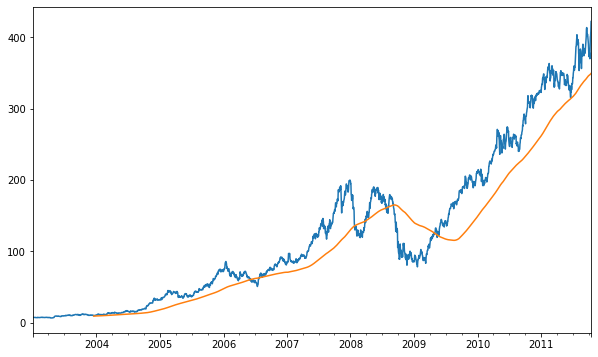

In [145]:
close_px.AAPL.plot()

# rolling(250) : 그룹을 생성하는 대신 
# 250일 크기의 움직이는 창을 통해 그룹핑 할 수 있는 객체 생성
close_px.AAPL.rolling(250).mean().plot()

In [146]:
# 결측치가 있을 때 처리를 위해 rolling 함수의 동작 방식이 변경됨
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

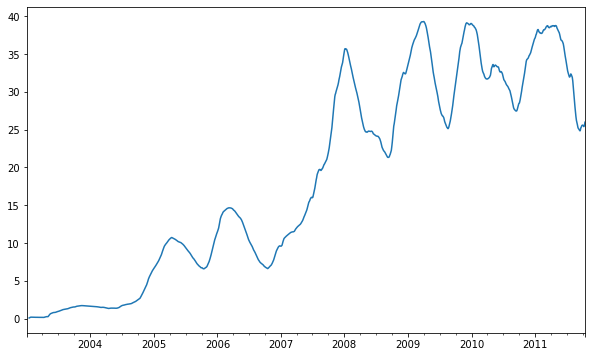

In [147]:
appl_std250.plot()

- 확장창평균 : 기계열의 시작 지범에서 부터 창의 크기가 시계열의 전체 크기가 될 때까지 점점 창의 크기를 늘린다.

<AxesSubplot:>

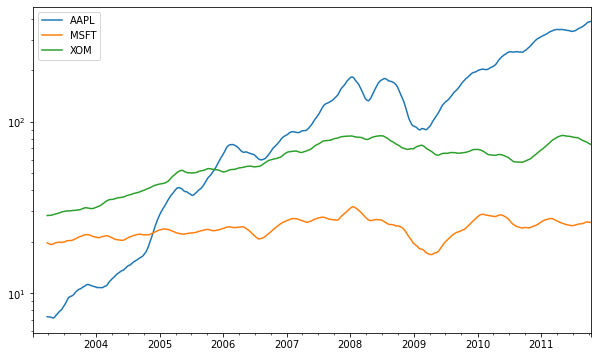

In [148]:
# 확장창 평균 expanding() 사용
expanding_mean = appl_std250.expanding().mean()

# 주가의 60일 이동평균
close_px.rolling(60).mean().plot(logy=True)

In [149]:
close_px.rolling('20D').mean() # 20일 크기의 이동평균

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


균등한 가중치를 가지는 관찰과 함께 고정 크기 창을 사용하는 다른방법은 감쇠인자 상수에 좀 더 많은 가중치를 줘서 더 최근 값을 관찰하는 것이다. 기간을 이용하여 결과를 같은 기간의 창을 가지는 단순 이동창 함수와 비교 가능하도록 하는 방법이 널리 사용된다.

지수 가중 통계는 최근 값에 좀 더 많은 가중치를 두는 방법이므로 균등 가중 방식보다 더 빠르게 변화를 수용한다.

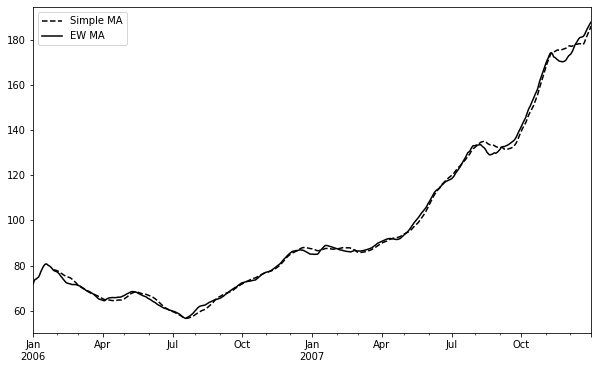

In [150]:
# 지수 가중 함수
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean() # 균등 가중 이동평균
ewma60 = aapl_px.ewm(span=30).mean() # 지수 가중 이동평균
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

In [151]:
# 이진 이동창 함수
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change() #pct_change : 수익률 계산
returns = close_px.pct_change()

상관관계 & 공분산 등의 두개의 시계열을 필요로 할 때 (ex. S&P 500) 이진 이동창 함수 사용

<AxesSubplot:>

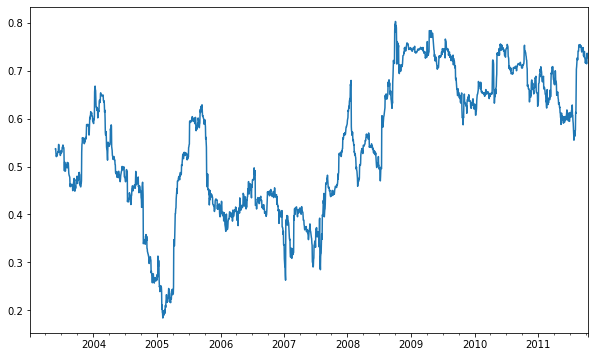

In [152]:
# 6개월간 S&P 500 지수와 APPL 수익 상관관계
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<AxesSubplot:>

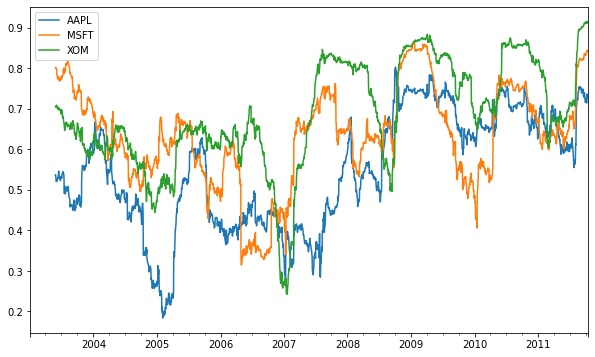

In [153]:
# 여러 주식과 S&P 500 지수와 상관관계
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

rolling이나 다른 관련 메서드에 apply를 호출하여 이동창에 대한 사용자 정의 연산을 수행한다.

요구사항 : 사용자 정의 함수가 배열의 각 조각으로부터 단일 값을 반환

(ex. 전체 표본에서 특정 값이 차지하는 백분위 점수를 구하는 함수 작성 - scipy.stats.percentileofscore)

<AxesSubplot:>

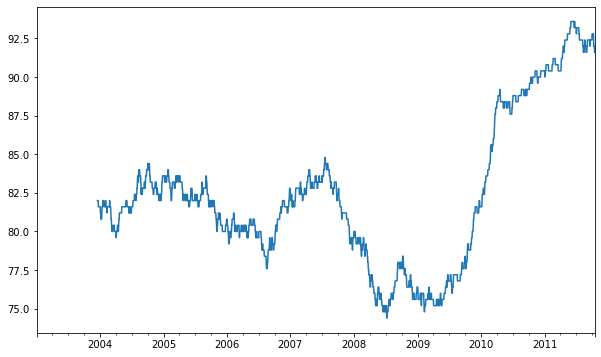

In [154]:
# 사용자 정의 이동창 함수
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot() # 2%의 연간 APPL 수익률에 대한 백분위 점수